## Women's Rights

### Georgetown Institute for Women, Peace and Security - Women Peace and Security Index

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

This is a time series dataset. During the years on which a given country has been in a specific situation: Interregnum, Transition, or Interruption, the dataset presents a value of -77, -88, or -66.

In [2]:
georgetown_df = pd.read_csv('../datasets/processed/women/georgetown/women-peace-and-security-index.csv', header=0)
print(f"Records: {len(georgetown_df)}")

georgetown_df.describe()


Records: 177


,wps_rank,women_peace_and_security_index,education,employment,financial_inclusion,cell_phone_use,parliamentary_representation,absence_of_legal_discrimination,access_to_justice,maternal_mortality_ratio,son_bias,intimate_partner_violence_,community_safety,political_violence_targeting_women,proximity_to_conflict
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,88.779661,0.680237,8.632570,58.228907,61.543885,82.420609,25.692449,77.683142,2.442528,146.677630,105.035743,12.371872,57.931828,0.125513,15.640860
std,51.236329,0.147954,3.511117,17.859355,27.870420,15.645795,11.962989,17.376689,0.864753,213.114796,1.710951,8.499897,16.074625,0.249443,28.879489
min,1.000000,0.286000,1.292844,5.492178,4.191030,32.000000,0.298507,26.250000,0.372000,1.100000,101.100000,2.000000,21.000000,0.000000,0.000000
25%,45.000000,0.582000,5.595629,49.826964,38.843760,74.242634,17.100000,70.625000,1.841000,11.010000,103.900000,6.000000,47.000000,0.000000,0.000000
50%,89.000000,0.691000,9.251560,58.981288,62.545160,88.000000,25.641026,81.250000,2.532000,56.690000,105.100000,10.000000,57.000000,0.007734,0.000000
75%,132.000000,0.796000,11.627060,72.702738,87.514650,94.000000,33.933934,89.375000,3.150000,203.900000,106.000000,18.000000,71.000000,0.118861,17.289007
max,177.000000,0.932000,13.914979,90.147069,100.000000,100.000000,54.716981,100.000000,3.960000,1223.000000,112.200000,45.300000,96.000000,1.179968,100.000000


I see that, based on the reference documentation, "maternal_mortality_ratio" has a max value of 1000, but the maximum value in the dataset is 1223.
This predictor is defined as the number of deaths due to pregnancy-related causes per 100,000 live births. This value is possible. I'll inspect it.

In [3]:
# Show the countries with maternal_mortality_ratio higher than 1000
georgetown_df[georgetown_df['maternal_mortality_ratio'] > 1000]



,iso3,wps_rank,country,women_peace_and_security_index,education,employment,financial_inclusion,cell_phone_use,parliamentary_representation,absence_of_legal_discrimination,access_to_justice,maternal_mortality_ratio,son_bias,intimate_partner_violence_,community_safety,political_violence_targeting_women,proximity_to_conflict
161,NGA,162,Nigeria,0.465,6.144916,58.907590,34.96408,76.000000,4.222222,66.25,2.526,1047.0,103.8,13.0,52.000000,0.179475,69.607753
162,TCD,163,Chad,0.462,1.489174,57.520389,22.56175,38.000000,25.888325,66.25,1.042,1063.0,104.2,16.0,47.000000,0.079299,22.357595
172,SSD,173,South Sudan,0.388,4.762170,55.655017,4.19103,58.360134,32.334385,67.50,0.876,1223.0,103.5,27.0,48.396511,1.179968,79.738843


The Women, Peace, and Security Index is calculated from the other predictors, so the correlation is forced. Some considerations are taken in this calculation, like setting minimum or maximum values to some predictors. The calculation isn't documented.

I'll force a linear regression. Given that the WPS is supposed to be an average, I'll see which predictor weights more in the final value, which should be based on the own predictor's variance.

In [4]:
# Use statsmodels to force a linear regression
predictors = ['education', 'employment', 'financial_inclusion', 'cell_phone_use', 'parliamentary_representation', 'absence_of_legal_discrimination', 'access_to_justice', 'maternal_mortality_ratio', 'son_bias', 'intimate_partner_violence_', 'community_safety', 'political_violence_targeting_women', 'proximity_to_conflict']
georgetown_df_components = georgetown_df[predictors]
X = sm.add_constant(georgetown_df_components)
model = sm.OLS(georgetown_df['women_peace_and_security_index'], georgetown_df_components)
results = model.fit()
print(results.summary())

                                       OLS Regression Results                                      
Dep. Variable:     women_peace_and_security_index   R-squared (uncentered):                   0.998
Model:                                        OLS   Adj. R-squared (uncentered):              0.998
Method:                             Least Squares   F-statistic:                              7084.
Date:                            Mon, 05 May 2025   Prob (F-statistic):                   4.40e-218
Time:                                    20:37:54   Log-Likelihood:                          373.40
No. Observations:                             177   AIC:                                     -720.8
Df Residuals:                                 164   BIC:                                     -679.5
Df Model:                                      13                                                  
Covariance Type:                        nonrobust                                                  


As expected, all the predictors are statistically significant. The R-squared is 0.998, which means this model is a good predictor of the WPS Index.

The coefficients vary because the predictors have different ranges. I'll standardize them before running the regression.

In [5]:
scaler = StandardScaler()
georgetown_df_scaled = scaler.fit_transform(georgetown_df_components)
georgetown_df_scaled = pd.DataFrame(
    georgetown_df_scaled,
    index=georgetown_df_components.index,
    columns=georgetown_df_components.columns
)
georgetown_df_scaled.describe()

,education,employment,financial_inclusion,cell_phone_use,parliamentary_representation,absence_of_legal_discrimination,access_to_justice,maternal_mortality_ratio,son_bias,intimate_partner_violence_,community_safety,political_violence_targeting_women,proximity_to_conflict
count,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,177.000000,1.770000e+02,1.770000e+02
mean,-3.211493e-16,-1.204310e-16,4.415802e-16,1.204310e-16,1.605746e-16,-1.204310e-16,-4.014366e-16,-1.204310e-16,-6.904709e-15,8.028731e-17,0.000000,1.003591e-16,-8.028731e-17
std,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837,1.002837e+00,1.002837e+00
min,-2.096355e+00,-2.961268e+00,-2.063677e+00,-3.231772e+00,-2.128731e+00,-2.968290e+00,-2.401151e+00,-6.850328e-01,-2.306851e+00,-1.223697e+00,-2.304041,-5.045982e-01,-5.431271e-01
25%,-8.674038e-01,-4.717851e-01,-8.167987e-01,-5.241776e-01,-7.202903e-01,-4.073368e-01,-6.975808e-01,-6.384001e-01,-6.656913e-01,-7.517676e-01,-0.681997,-5.045982e-01,-5.431271e-01
50%,1.767944e-01,4.224763e-02,3.602800e-02,3.576181e-01,-4.310737e-03,2.058492e-01,1.037585e-01,-4.234474e-01,3.766287e-02,-2.798387e-01,-0.058133,-4.735065e-01,-5.431271e-01
75%,8.552789e-01,8.127333e-01,9.344833e-01,7.421956e-01,6.908696e-01,6.747561e-01,8.204410e-01,2.692666e-01,5.651785e-01,6.640192e-01,0.815275,-2.674180e-02,5.723170e-02
max,1.508749e+00,1.792266e+00,1.383733e+00,1.126773e+00,2.433077e+00,1.287942e+00,1.759782e+00,5.064762e+00,4.199175e+00,3.884934e+00,2.374934,4.239226e+00,2.929361e+00


In [6]:
X = sm.add_constant(georgetown_df_scaled)
model = sm.OLS(georgetown_df['women_peace_and_security_index'], X)
results = model.fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     women_peace_and_security_index   R-squared:                       0.964
Model:                                        OLS   Adj. R-squared:                  0.961
Method:                             Least Squares   F-statistic:                     331.9
Date:                            Mon, 05 May 2025   Prob (F-statistic):          6.19e-110
Time:                                    20:37:54   Log-Likelihood:                 380.78
No. Observations:                             177   AIC:                            -733.6
Df Residuals:                                 163   BIC:                            -689.1
Df Model:                                      13                                         
Covariance Type:                        nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025

Here we can see how the most important predictors are:
- Education
- Proximity to Conflict
- Intimate Partner Violence
- Community Safety
- Financial Inclusion
- Maternal Mortality Ratio

Some predictors like cell_phone_use and son_bias aren't very important.

Now I'll run a PCA to see which predictors add more variance to the dataset.

Text(0, 0.5, 'PC2')

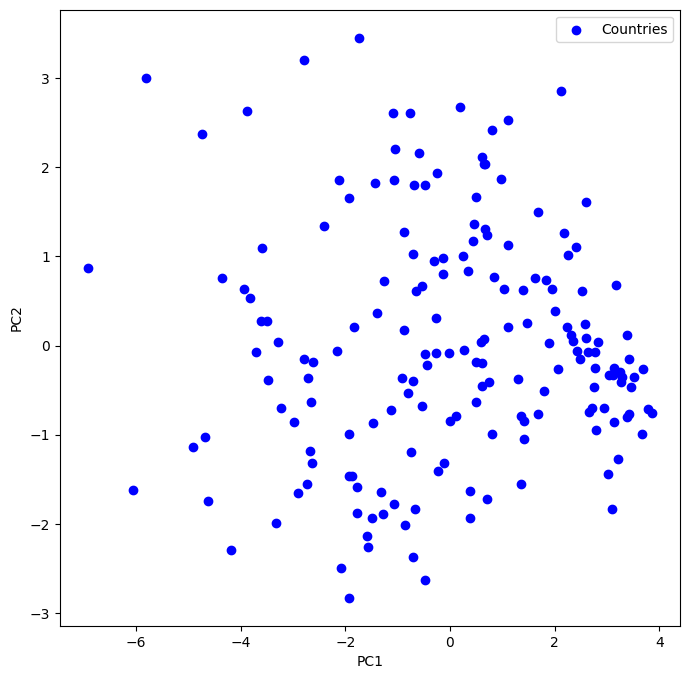

In [7]:
pca = PCA()
pca.fit(georgetown_df_scaled)
scores = pca.transform(georgetown_df_scaled)
scores.shape

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:, 1], color='blue', label='Countries')
ax.legend()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

Plotting the PCA with only two components demonstrated high variance.

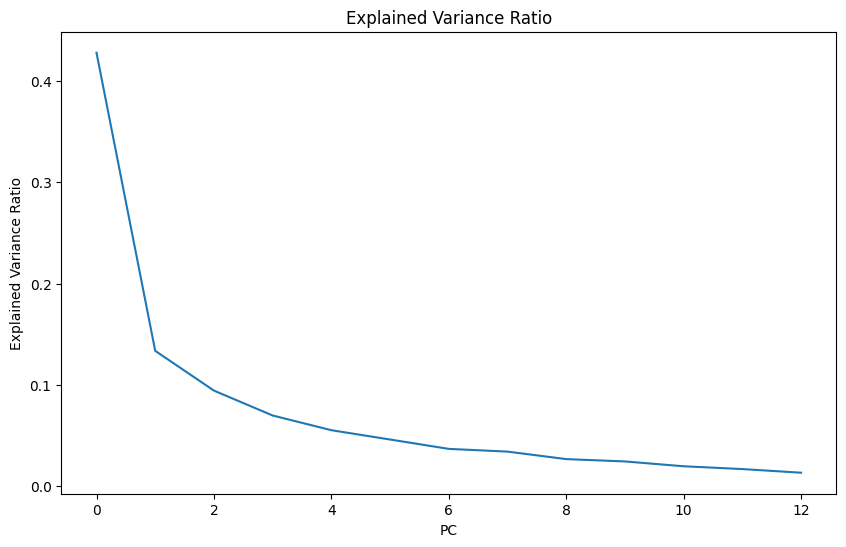

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio')
plt.xlabel('PC')
plt.ylabel('Explained Variance Ratio')
plt.show()

The first principal component explains 40% of the variance. I'll analyze the loadings of the first principal component to understand which predictors are more important to understand the difference between the countries.

In [9]:
# Print the loadings of the first principal component associated with the predictors
loadings = pd.DataFrame(
    {'Predictor': predictors,
     'Loading': pca.components_[0]
    }
).sort_values(by='Loading', ascending=False)

print("First Principal Component Loadings:")
print(loadings)

First Principal Component Loadings:
                             Predictor   Loading
2                  financial_inclusion  0.366811
0                            education  0.363477
3                       cell_phone_use  0.342189
6                    access_to_justice  0.304698
5      absence_of_legal_discrimination  0.296068
1                           employment  0.209948
10                    community_safety  0.208869
8                             son_bias  0.198302
4         parliamentary_representation  0.159671
11  political_violence_targeting_women -0.181330
12               proximity_to_conflict -0.245949
7             maternal_mortality_ratio -0.302861
9           intimate_partner_violence_ -0.313249


Similarly to what we saw in the regression, the most important predictors are:
- Education
- Financial Inclusion
- Intimate Partner Violence
- Maternal Mortality Ratio
- Proximity to Conflict
- Access to Justice

Here Cell Phone Use seems to add more variance to the model.



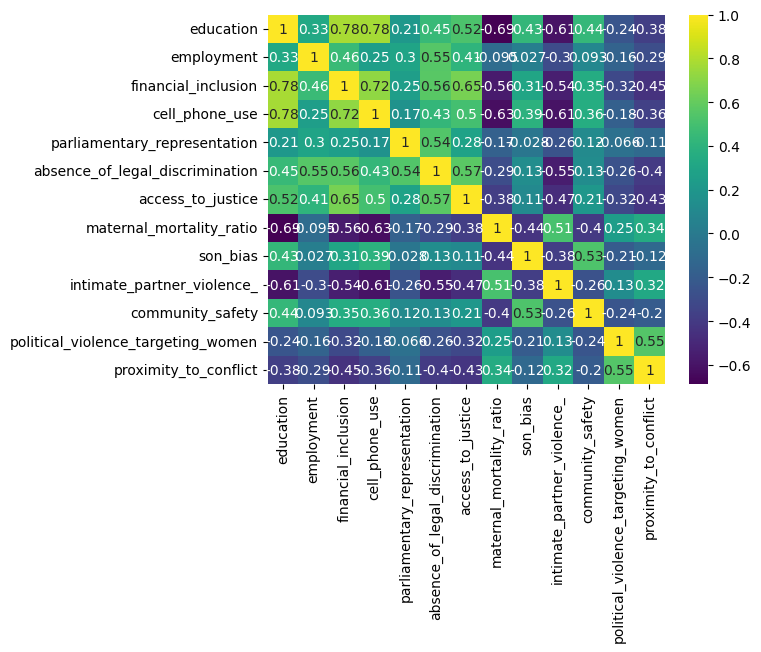

In [10]:
sns.heatmap(georgetown_df_scaled.corr(), cmap="viridis", annot = True)
plt.show()

Surprisingly there isn't a strong correlation between the predictors. The ones that are more correlated (Or inversely correlated) are the same I highlighted before:
- Education
- Financial Inclusion
- Maternal Mortality Ratio
- Intimate Partner Violence
- Cell Phone Use

In this case the second principal component is relatively important.

In [11]:
# Print the loadings of the second principal component associated with the predictors
loadings = pd.DataFrame(
    {'Predictor': predictors,
     'Loading': pca.components_[1]
    }
).sort_values(by='Loading', ascending=False)

print("First Principal Component Loadings:")
print(loadings)

First Principal Component Loadings:
                             Predictor   Loading
8                             son_bias  0.473262
10                    community_safety  0.372230
0                            education  0.153697
3                       cell_phone_use  0.153177
12               proximity_to_conflict  0.114760
11  political_violence_targeting_women  0.016113
9           intimate_partner_violence_ -0.016629
2                  financial_inclusion -0.034153
6                    access_to_justice -0.225230
7             maternal_mortality_ratio -0.279214
4         parliamentary_representation -0.369921
5      absence_of_legal_discrimination -0.383510
1                           employment -0.403608


In this case son_bias and community_safety are the most important predictors.